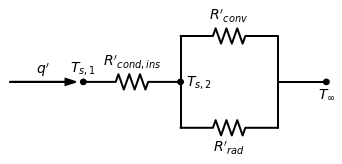

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts
import schemdraw as schem
import schemdraw.elements as e

from Libraries import thermodynamics as thermo
from Libraries import HT_thermal_resistance as res

qdot = 4 #W/m
r_1 = 1e-3 #m
T_infty = T_sur = 20.0 #C
def h(Ts,D):
    global T_infty
    return 1.25*((Ts - T_infty)/D)**(1/4)
eps = 0.9
k = 0.26 #W/m.K

R = []
R.append(res.Resistance("$R'_{cond,ins}$", "W/m"))
R.append(res.Resistance("$R'_{conv}$", "W/m"))
R.append(res.Resistance("$R'_{rad}$", "W/m"))

d = schem.Drawing()
d.add(e.DOT, label = r"$T_{s,1}$")
R1 = d.add(e.RES, d = 'right', label = R[0].name)
d.add(e.DOT, rgtlabel = r"$T_{s,2}$")
d.add(e.LINE, d= 'up', l = 1.5)
d.add(e.RES, d='right', label = R[1].name)
d.add(e.LINE, d='down', l = 1.5)
d.add(e.LINE, d='down', l = 1.5, xy = R1.end)
d.add(e.RES, d='right', botlabel = R[2].name)
d.add(e.LINE, d= 'up', l = 1.5)
d.add(e.LINE,d='right',l=1.5)
d.add(e.DOT, botlabel="$T_\infty$")

L1 = d.add(e.LINE, toplabel = "$q'$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()

This thermal circuit reduces to :

$$
q' = \frac{1}{R'_{tot}}(T_{s,1} - T_\infty)
$$

with 
$$
R'_{tot}= R'_{cond,ins}+ \left(\frac{1}{R'_{conv}}+\frac{1}{R'_{rad}}\right)^{-1}$$


$$
R'_{cond,ins} = \frac{\ln (r_2/r_1)}{2\pi k }
$$

$$
R'_{conv}=\frac{1}{h(T_{s,2},2r_2)2\pi r_2}
$$

$$
R'_{rad}=\frac{1}{h_r(T_{s,2})2\pi r_2}
$$

Conservation of energy on surface of insulation:
$$
\dot{q}-q'_{conv}-q'_{rad}=0
$$


In [8]:
from scipy.optimize import fsolve
n = 51
thicknesses = np.linspace(0.1e-3,4e-3,n)
T_s1_plt = np.zeros(n)
T_s2_plt = np.zeros(n)
for i in range(n):
    r_2 = r_1 + thicknesses[i]
    def fconsE(Ts):
        R[1].convection(h(Ts,2*r_2),2*np.pi*r_2)
        R[2].radiation(eps,thermo.C2K(Ts),thermo.C2K(T_infty),2*np.pi*r_2 )
        return qdot - (Ts - T_infty)/R[1].R - (Ts - T_infty)/R[2].R
    sol = fsolve(fconsE, x0=[50.])
    T_s2 = sol[0]
    R[0].cond_cylinder(k,r_1,r_2)
    T_s1 = T_s2 + qdot*R[0].R
    T_s1_plt[i] = T_s1
    T_s2_plt[i] = T_s2

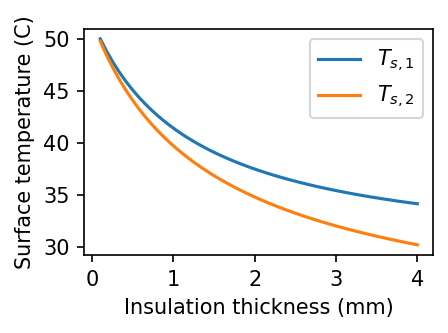

In [12]:
plt.figure(figsize=(3,2), dpi=150)
plt.plot(thicknesses*1e3, T_s1_plt, label=r"$T_{s,1}$")
plt.plot(thicknesses*1e3, T_s2_plt, label=r"$T_{s,2}$")
plt.xlabel("Insulation thickness (mm)")
plt.ylabel("Surface temperature (C)")
plt.legend()
plt.show()